In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('yes_date_set.csv')
df.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,Holiday_Independence Day,Holiday_Independence Day (Observed),Holiday_Labor Day,"Holiday_Martin Luther King, Jr. Day",Holiday_Memorial Day,Holiday_New Year's Day,Holiday_None,Holiday_Thanksgiving,Holiday_Veterans Day,Holiday_Washington's Birthday
0,2013/8/29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,0,0,0,0,0,0,1,0,0,0
1,2013/8/30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,0,0,0,0,0,0,1,0,0,0
2,2013/8/31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,0,0,0,0,0,0,1,0,0,0
3,2013/9/1,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,0,0,0,0,0,0,1,0,0,0
4,2013/9/2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
zip_code_94041 = df.zip_code_94041 == 1
zip_code_94063 = df.zip_code_94063 == 1
zip_code_94107 = df.zip_code_94107 == 1
zip_code_94301 = df.zip_code_94301 == 1
zip_code_95113 = df.zip_code_95113 == 1

In [4]:
df['transdate'] = pd.to_datetime(df['date'])
df['transdate'] = df['transdate'].dt.strftime('%B - %Y')

In [5]:
from dateutil.rrule import rrule, MONTHLY
import datetime

def month_year_iter( start_month, start_year, end_month, end_year ):
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month 
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        yield y, m+1

# Getting all the possible month and year in the dataset as in 'month -- year' format
date_month_year =[]  
for m in month_year_iter(8,2013,8,2016):
    month = datetime.date(1990, int(m[1]), 1).strftime('%B')
    date = '{} - {}'.format(month, m[0])
    date_month_year.append(date)
    
print(date_month_year)

['August - 2013', 'September - 2013', 'October - 2013', 'November - 2013', 'December - 2013', 'January - 2014', 'February - 2014', 'March - 2014', 'April - 2014', 'May - 2014', 'June - 2014', 'July - 2014', 'August - 2014', 'September - 2014', 'October - 2014', 'November - 2014', 'December - 2014', 'January - 2015', 'February - 2015', 'March - 2015', 'April - 2015', 'May - 2015', 'June - 2015', 'July - 2015', 'August - 2015', 'September - 2015', 'October - 2015', 'November - 2015', 'December - 2015', 'January - 2016', 'February - 2016', 'March - 2016', 'April - 2016', 'May - 2016', 'June - 2016', 'July - 2016', 'August - 2016']


In [6]:
# Grouping which data matches with the corresponding month -- year in date_month_year
# August 2013
date_monthNyear = []
for element in date_month_year:
    date_monthNyear.append(df.transdate == element)

0        True
1        True
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5465    False
5466    False
5467    False
5468    False
5469    False
5470    False
5471    False
5472    False
5473    False
5474    False
5475    False
5476    False
5477    False
5478    False
5479    False
5480    False
5481    False
5482    False
5483    False
5484    False
5485    False
5486    False
5487    False
5488    False
5489    False
5490    False
5491    False
5492    False
5493    False
5494    False
Name: transdate, Length: 5495, dtype: bool


### Getting Month_Year with each zipcode

In [7]:
def date_zipcode(date_zip, zipcode):
    date_zip = []
    for element in date_monthNyear:
        date_zip.append(df[element & zipcode])
    return date_zip

df_dayN94041 = date_zipcode('df_dayN94041', zip_code_94041)
df_dayN94063 = date_zipcode('df_dayN94063', zip_code_94063)
df_dayN94107 = date_zipcode('df_dayN94107', zip_code_94107)
df_dayN94301 = date_zipcode('df_dayN94301', zip_code_94301)
df_dayN95113 = date_zipcode('df_dayN95113', zip_code_95113)
    

### Plotting scatter plot: trip count in each day in a month in a year corresponding to each zipcode 

In [ ]:
def scatter_zipcode(ziplist, zipcode):
    df_list = []
    for c, n in enumerate(ziplist):
        plt.scatter(n.date, n.trip_count, 5)
        title = date_month_year[c] + " in Zip Code " + zipcode
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Trip Counts')
        plt.show()
        #print(c+1)
        #plt.savefig(title, dpi= 200)
        #plt.clf()

scatter_zipcode(df_dayN94041,'94041')        
scatter_zipcode(df_dayN94063,'94063')  
scatter_zipcode(df_dayN94107,'94107')
scatter_zipcode(df_dayN94301,'94301')
scatter_zipcode(df_dayN95113,'95113')

### Plotting line chart: trip count in each day in a month in a year corresponding to each zipcode 

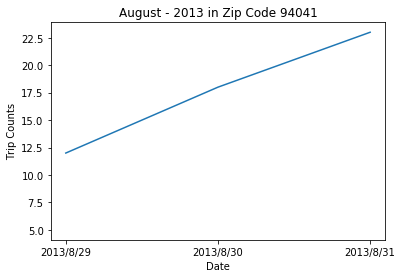

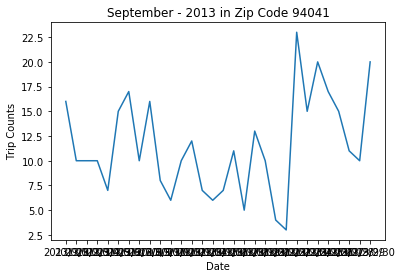

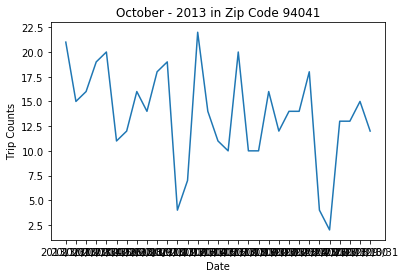

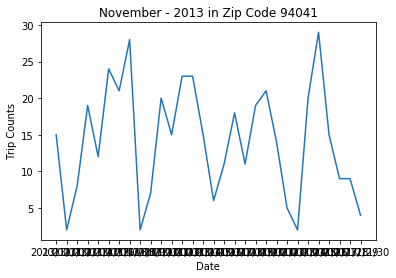

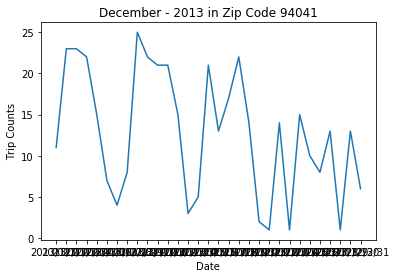

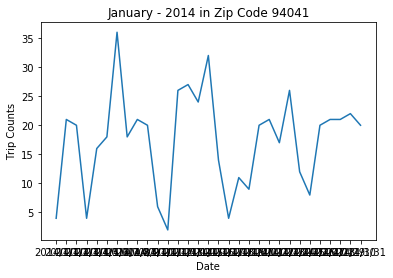

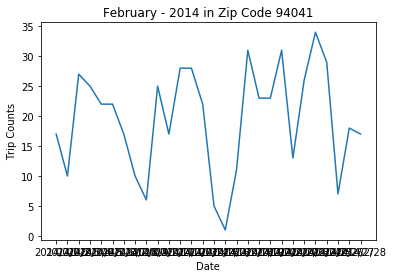

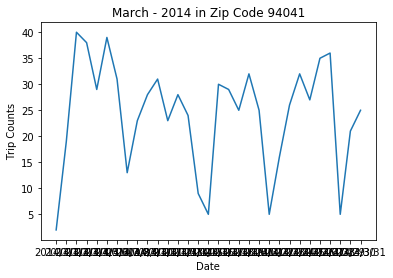

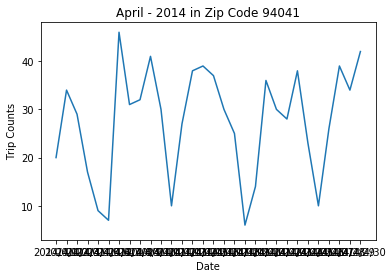

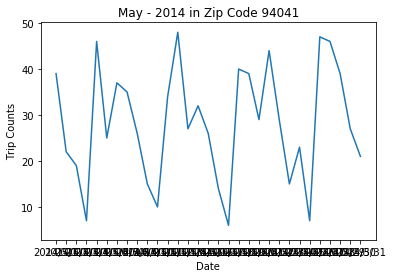

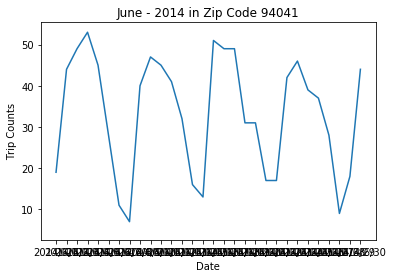

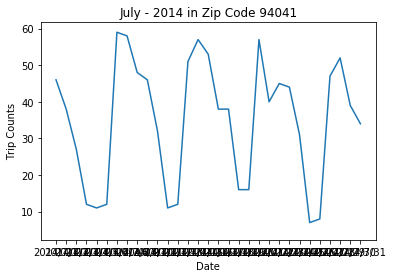

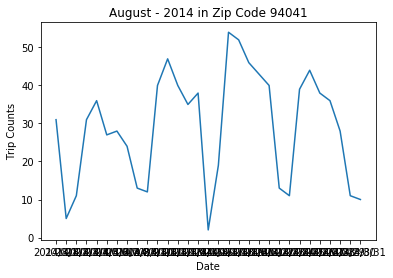

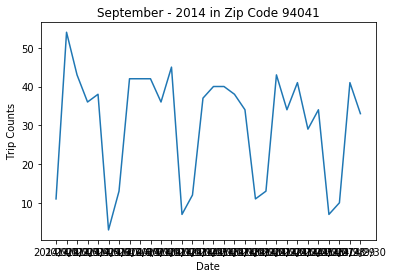

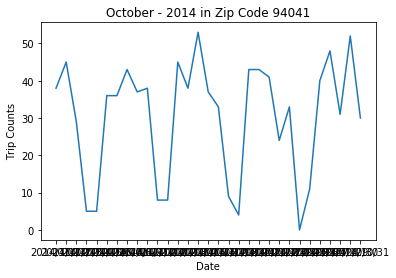

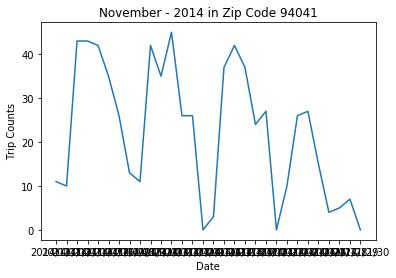

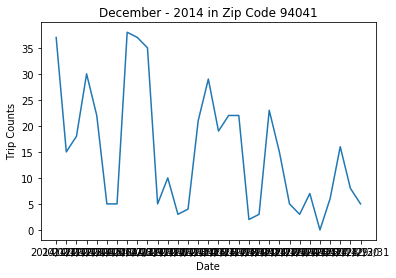

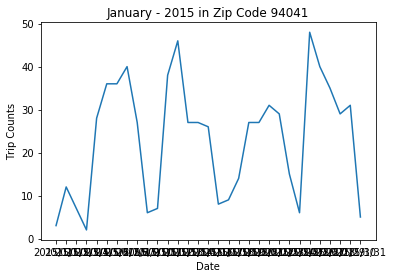

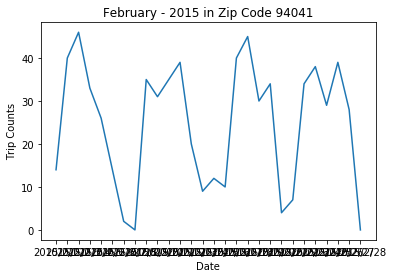

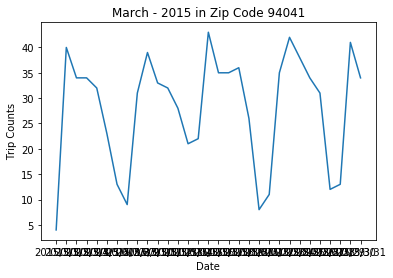

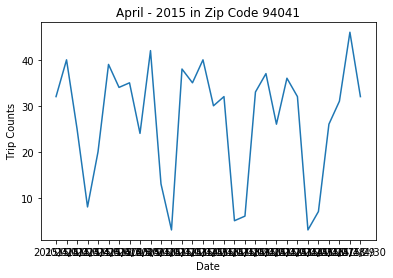

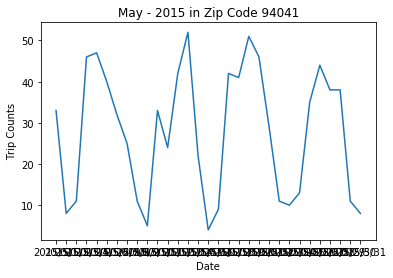

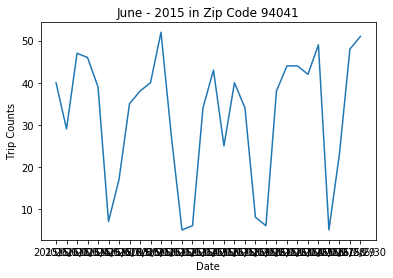

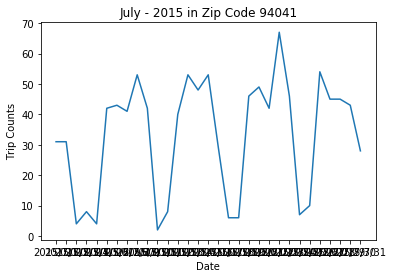

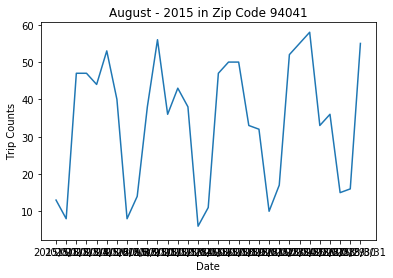

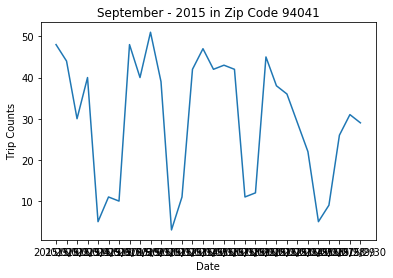

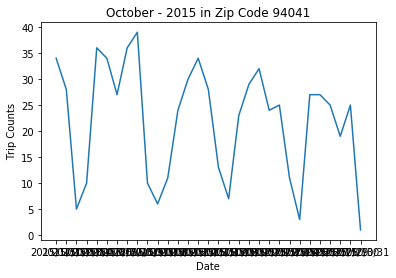

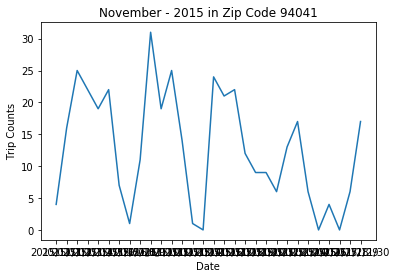

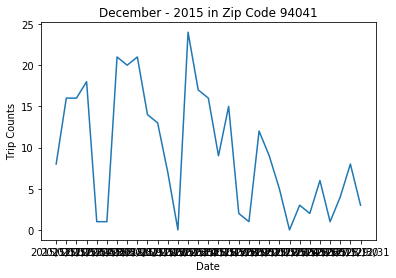

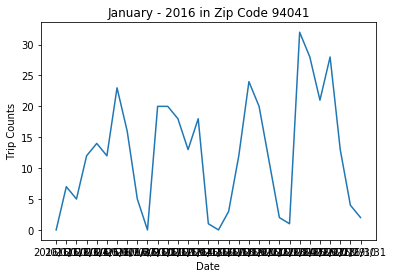

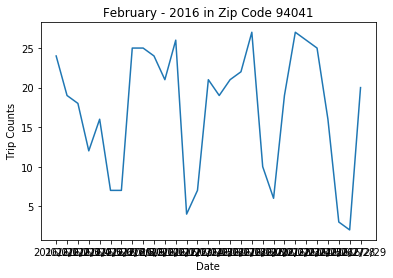

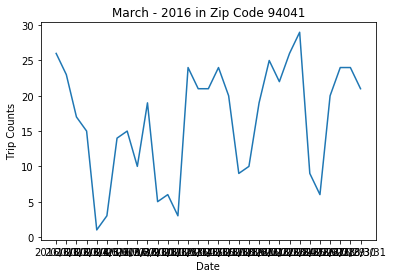

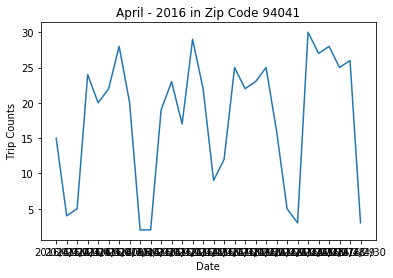

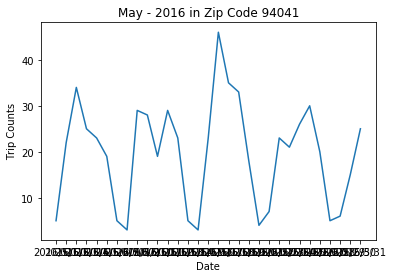

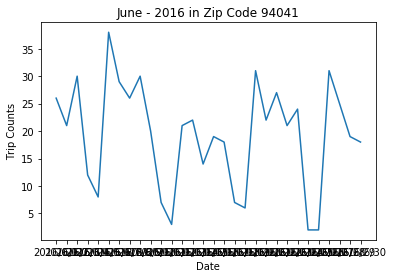

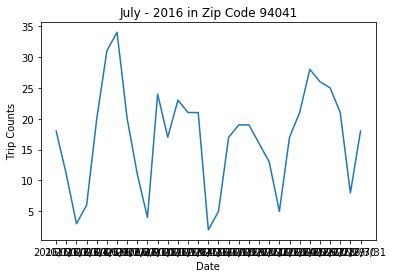

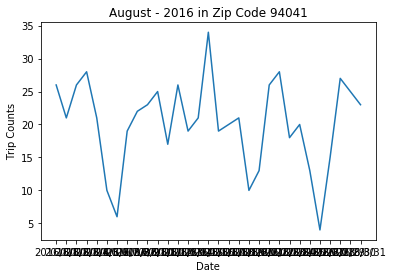

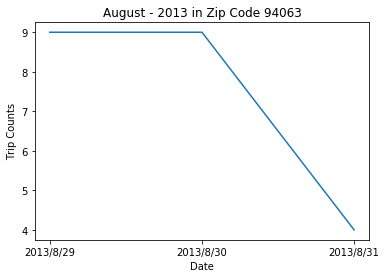

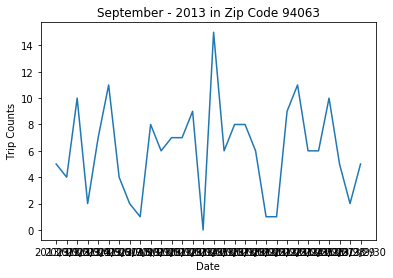

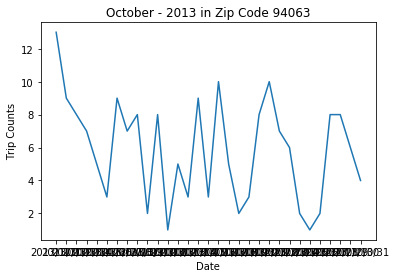

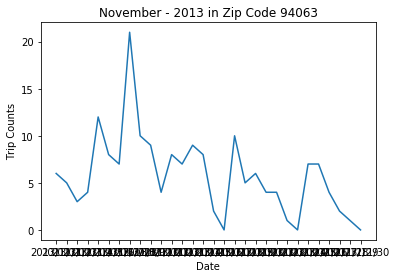

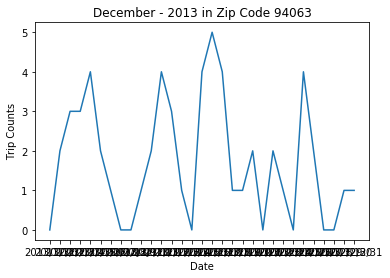

KeyboardInterrupt: 

In [8]:
def line_zipcode(ziplist, zipcode):
    df_list = []                                              
    for c, n in enumerate(ziplist):                          
        plt.plot(n.date, n.trip_count, 5)                   
        title = date_month_year[c] + " in Zip Code " + zipcode 
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Trip Counts')
        plt.show()
        #print(c+1)
        #plt.savefig(title, dpi= 200)
        #plt.clf()

line_zipcode(df_dayN94041,'94041')        
line_zipcode(df_dayN94063,'94063')  
line_zipcode(df_dayN94107,'94107')
line_zipcode(df_dayN94301,'94301')
line_zipcode(df_dayN95113,'95113')  